<a href="https://colab.research.google.com/github/krmonline/geneticAlgorithm/blob/main/geneticArea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 
     |████████████████████████████████| 15.4 MB 33.1 MB/s 


In [3]:
from shapely.geometry import Polygon, LineString, Point ,box
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import numpy as np

In [8]:
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.shp
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.shx
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.sbx
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.sbn
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.prj
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.dbf
!wget https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.CPG

--2022-01-27 05:13:43--  https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753948 (736K) [application/octet-stream]
Saving to: ‘dwr11_flood_07.shp.1’

dwr11_flood_07.shp. 100%[===================>] 736.28K  --.-KB/s    in 0.05s   

2022-01-27 05:13:43 (15.4 MB/s) - ‘dwr11_flood_07.shp.1’ saved [753948/753948]

--2022-01-27 05:13:43--  https://raw.githubusercontent.com/krmonline/geneticAlgorithm/9796f7f2c953b9f81e4487a367b566f32af18a89/data/dwr11_flood_07.shx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

In [16]:
sh4 = geopandas.read_file('dwr11_flood_07.shp')
sh4 = sh4.to_crs(epsg=4326)

In [17]:
myArea = geopandas.GeoSeries(sh4.iloc[0].geometry)

In [18]:
sh4.head()

,PROVINCE_I,ADMIN_LEVE,PROVINCE_N,REGION_NES,DISTRICT_I,ADMIN_LE_1,DISTRICT_N,TAMBON_ID,TAMBON_NAM,PROV_NAME,DWR1_11,calsqkm,calrai,Tamcode,FID_1,TAMBON_IDN,GEOCODE,TAMBON_T,TAMBON_E,AMPHOE_IDN,AMPHOE_T,AMPHOE_E,PROV_CODE,PROV_T,PROV_E,geometry
0,34,2,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,3411,3,ตระการพืชผล,341102,กระเดียน,UBON RATCHATHANI,สทภ.11,42.700621,26687.888241,341102.0,103,341102.0,341102,ต.กระเดียน,Kradian,3411.0,อ.ตระการพืชผล,Trakan Phuet Phon District,34.0,จ.อุบลราชธานี,Ubon Ratchathani,"POLYGON ((105.13819 15.63864, 105.13762 15.637..."
1,34,2,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,3411,3,ตระการพืชผล,341105,ขามเปี้ย,UBON RATCHATHANI,สทภ.11,72.037245,45023.278154,341105.0,108,341105.0,341105,ต.ขามเปี้ย,Kham Pia,3411.0,อ.ตระการพืชผล,Trakan Phuet Phon District,34.0,จ.อุบลราชธานี,Ubon Ratchathani,"POLYGON ((104.93331 15.60005, 104.93437 15.599..."
2,34,2,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,3411,3,ตระการพืชผล,341106,คอนสาย,UBON RATCHATHANI,สทภ.11,76.505559,47815.974224,341106.0,89,341106.0,341106,ต.คอนสาย,Khon Sai,3411.0,อ.ตระการพืชผล,Trakan Phuet Phon District,34.0,จ.อุบลราชธานี,Ubon Ratchathani,"POLYGON ((105.19608 15.76172, 105.19582 15.761..."
3,34,2,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,3411,3,ตระการพืชผล,341111,ตระการ,UBON RATCHATHANI,สทภ.11,55.055135,34409.459651,341111.0,81,341111.0,341111,ต.ตระการ,Trakan,3411.0,อ.ตระการพืชผล,Trakan Phuet Phon District,34.0,จ.อุบลราชธานี,Ubon Ratchathani,"POLYGON ((105.06010 15.49972, 105.06055 15.499..."
4,34,2,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,3411,3,ตระการพืชผล,341113,ไหล่ทุ่ง,UBON RATCHATHANI,สทภ.11,50.926630,31829.143641,341113.0,101,341113.0,341113,ต.ไหล่ทุ่ง,Lai Thung,3411.0,อ.ตระการพืชผล,Trakan Phuet Phon District,34.0,จ.อุบลราชธานี,Ubon Ratchathani,"POLYGON ((104.99849 15.65842, 104.99868 15.657..."


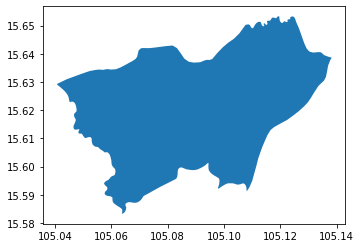

In [19]:
myArea.plot()

In [20]:
def getMaxArea(pol):
    x,y = pol.exterior.xy
    return([np.min(x),np.max(x),np.min(y),np.max(y)])

def genPoint(n,ix,mx,iy,my,size=0.01):
    arr =  []
    for i in range(n):
        x = random.randrange(int(ix*1000),int(mx*1000))
        y = random.randrange(int(iy*1000),int(my*1000))
        arr.append(Point(x/1000,y/1000))
    s = geopandas.GeoSeries(arr)
    s = s.geometry.buffer(size)
    return  s

def unionPoint(arr):
    for  i in range(len(arr)):
        if i == 0:
            u = arr[i]
        else:
            u = u.union(arr[i])
    return u

def diffArea(myArea,u):
    return myArea.difference(u)

def dropPop(myPop,n=2):
    return myPop.sort_values('area',ascending=True).iloc[:-n]

def genNewPop(myPop,n=2):
    arr =  []
    for i in range(n):
        i = random.randrange(len(myPop))
        a = myPop.iloc[i]
        #print(a)
        b = mutation(a)
        #print(b)
        arr.append(b)
    return pd.DataFrame(arr)    

def mutation(a):
    s = [0.008,0.008,0.008,0.008,0.008,0.008,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005]
    a = a.drop("area")
    #random pos
    arr_index = list(a.index)
    #print(arr_index)
    for j in range(int(len(s)/10)):
        i = random.randrange(len(arr_index))
        a[i] = genPoint(1,ix,mx,iy,my,s[i]).iloc[0]
    u = unionPoint(a)
    d = diffArea(myArea,u)
    area = d.area.values[0]
    a["area"] = area
    return a
    
def dropPopMin(myPop):
    myPop =  myPop.drop("area",axis=1)
    arr = []
    for i in myPop.iterrows():
        indx  =  i[0]
        row = i[1]
        tmp = geopandas.GeoSeries(row)
        for j in tmp:
            distance = np.sum(tmp.distance(j))
        arr.append(distance)
    return arr

In [22]:
#dropPopMin(myPop)

In [23]:
import rtree
import pygeos

ModuleNotFoundError: ignored

In [ ]:
!pip list|grep pygeos

In [24]:
ix,mx,iy,my = getMaxArea(myArea.iloc[0])
print(ix,mx,iy,my)
arr  = []
for i in range(500):
    a = genPoint(6,ix,mx,iy,my,0.008)
    arr.append(a)
arr2 = []
for i in range(500):
    b = genPoint(10,ix,mx,iy,my,0.005)
    arr2.append(b)
arr = np.append(np.array(arr).T,np.array(arr2).T,axis=0).T

105.04058539797553 105.13819175670946 15.583176271749323 15.653339280421806


In [25]:
arrArea  = []
for i in range(len(arr)):
    u = unionPoint(arr[i])
    d = diffArea(myArea,u)
    area = d.area.values[0]
    arrArea.append(area)

In [26]:
myPop = pd.DataFrame(arr)
myPop['area'] = arrArea

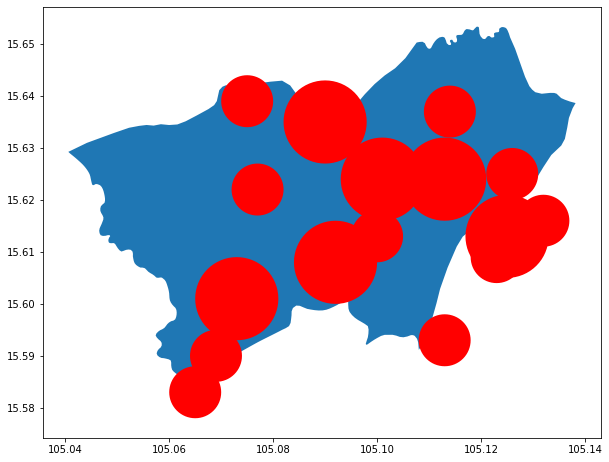

In [27]:
dfLast = myPop.sort_values('area',ascending=True).iloc[0].drop('area')
dfLast = geopandas.GeoSeries(dfLast) 
fig, ax = plt.subplots(figsize=(10,10))
myArea.plot(ax=ax)
dfLast.plot(ax=ax,color='red') 

.

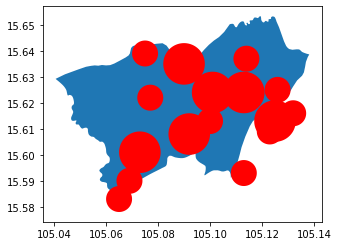

..........

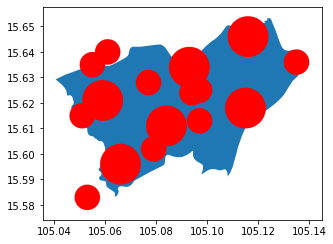

..........

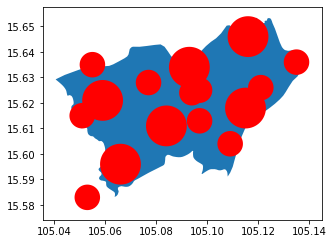

..........

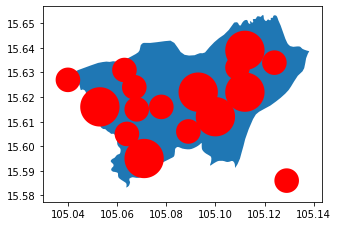

..........

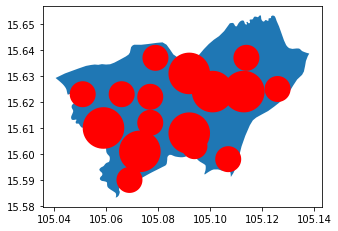

..........

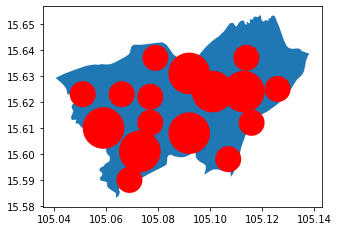

..........

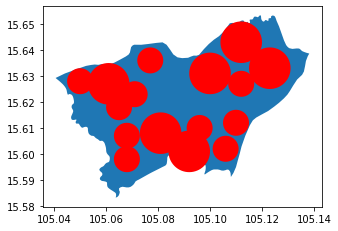

..........

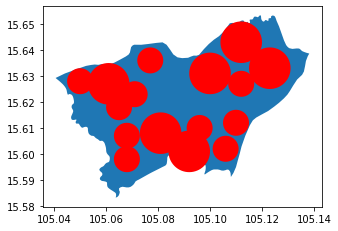

..........

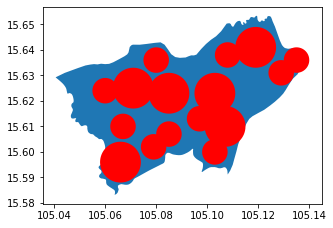

..........

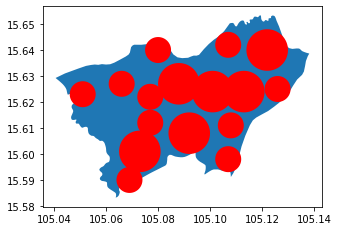

.........

In [28]:
n = 2
for  i in range(10000):
    myPop = dropPop(myPop,n)
    o=genNewPop(myPop,n)
    myPop = myPop.append(o,ignore_index=True)
    if i%100 == 0:
        print(".",end="")
    if i%1000 ==  0:
        dfLast = myPop.sort_values('area',ascending=True).iloc[0].drop('area')
        dfLast = geopandas.GeoSeries(dfLast)
        fig , ax = plt.subplots(figsize=(5,5))
        myArea.plot(ax=ax)
        dfLast.plot(ax=ax,color='red')
        plt.show()

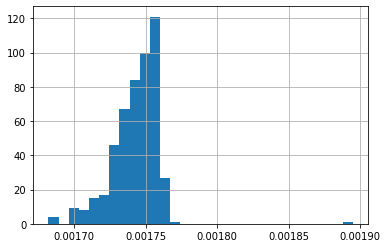

In [29]:
myPop.sort_values("area").area.hist(bins=30)

<AxesSubplot:>

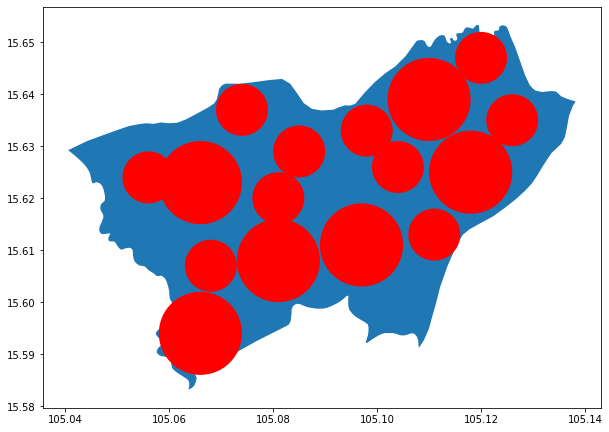

In [ ]:
dfLast = myPop.sort_values('area',ascending=True).iloc[0].drop('area')
dfLast = geopandas.GeoSeries(dfLast) 
fig, ax = plt.subplots(figsize=(10,10))
myArea.plot(ax=ax)
dfLast.plot(ax=ax,color='red') 


In [ ]:
print(myPop.iloc[0][1])

POLYGON ((105.115 15.638, 105.1149614778134 15.63721586287736, 105.1148462822432 15.63643927742387, 105.1146555226859 15.63567772258196, 105.1143910362601 15.63493853254108, 105.1140553701148 15.63422882610539, 105.1136517568984 15.63355543813584, 105.1131840836269 15.63292485372669, 105.1126568542495 15.63234314575051, 105.1120751462733 15.6318159163731, 105.1114445618642 15.63134824310158, 105.1107711738946 15.63094462988521, 105.1100614674589 15.63060896373991, 105.109322277418 15.63034447731414, 105.1085607225761 15.63015371775677, 105.1077841371226 15.63003852218662, 105.107 15.63, 105.1062158628774 15.63003852218662, 105.1054392774239 15.63015371775677, 105.104677722582 15.63034447731414, 105.1039385325411 15.63060896373991, 105.1032288261054 15.63094462988521, 105.1025554381358 15.63134824310158, 105.1019248537267 15.6318159163731, 105.1013431457505 15.63234314575051, 105.1008159163731 15.63292485372669, 105.1003482431016 15.63355543813584, 105.0999446298852 15.63422882610539, 1